# Working Version From Machinelearning mastery

In [1]:
# SG Sigmoid in Generator 
# WD Weak Discriminator
# SL Soft Labels
# GN Gaussian Noise (not uniform)


# TODO
# basic conditional gan
# generate data
# add and train a classifier use k fold also
# condition me one hot encoding
# generator k lie combined data and disc k lie train data.. coz testing me sara deke bias ho jaega
# different loss functions for generator and discriminator
# discriminator output shud be one hot encode with labels as n s or v and not 0 or 1 that is fake or real:
# confusion here
# disc property: should recognise fake and also if gen data is not of that class (so 2 things)
# training k time jab random samples uthaenge tab sari classes k
# equal no. of samples uthana

In [2]:
%config Completer.use_jedi = False

# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Reshape, multiply, Embedding, merge, Concatenate, Conv1D, BatchNormalization
from keras.layers import Dense, Flatten, Multiply
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.utils import to_categorical
import os
from numpy import asarray
import matplotlib.pyplot as plt

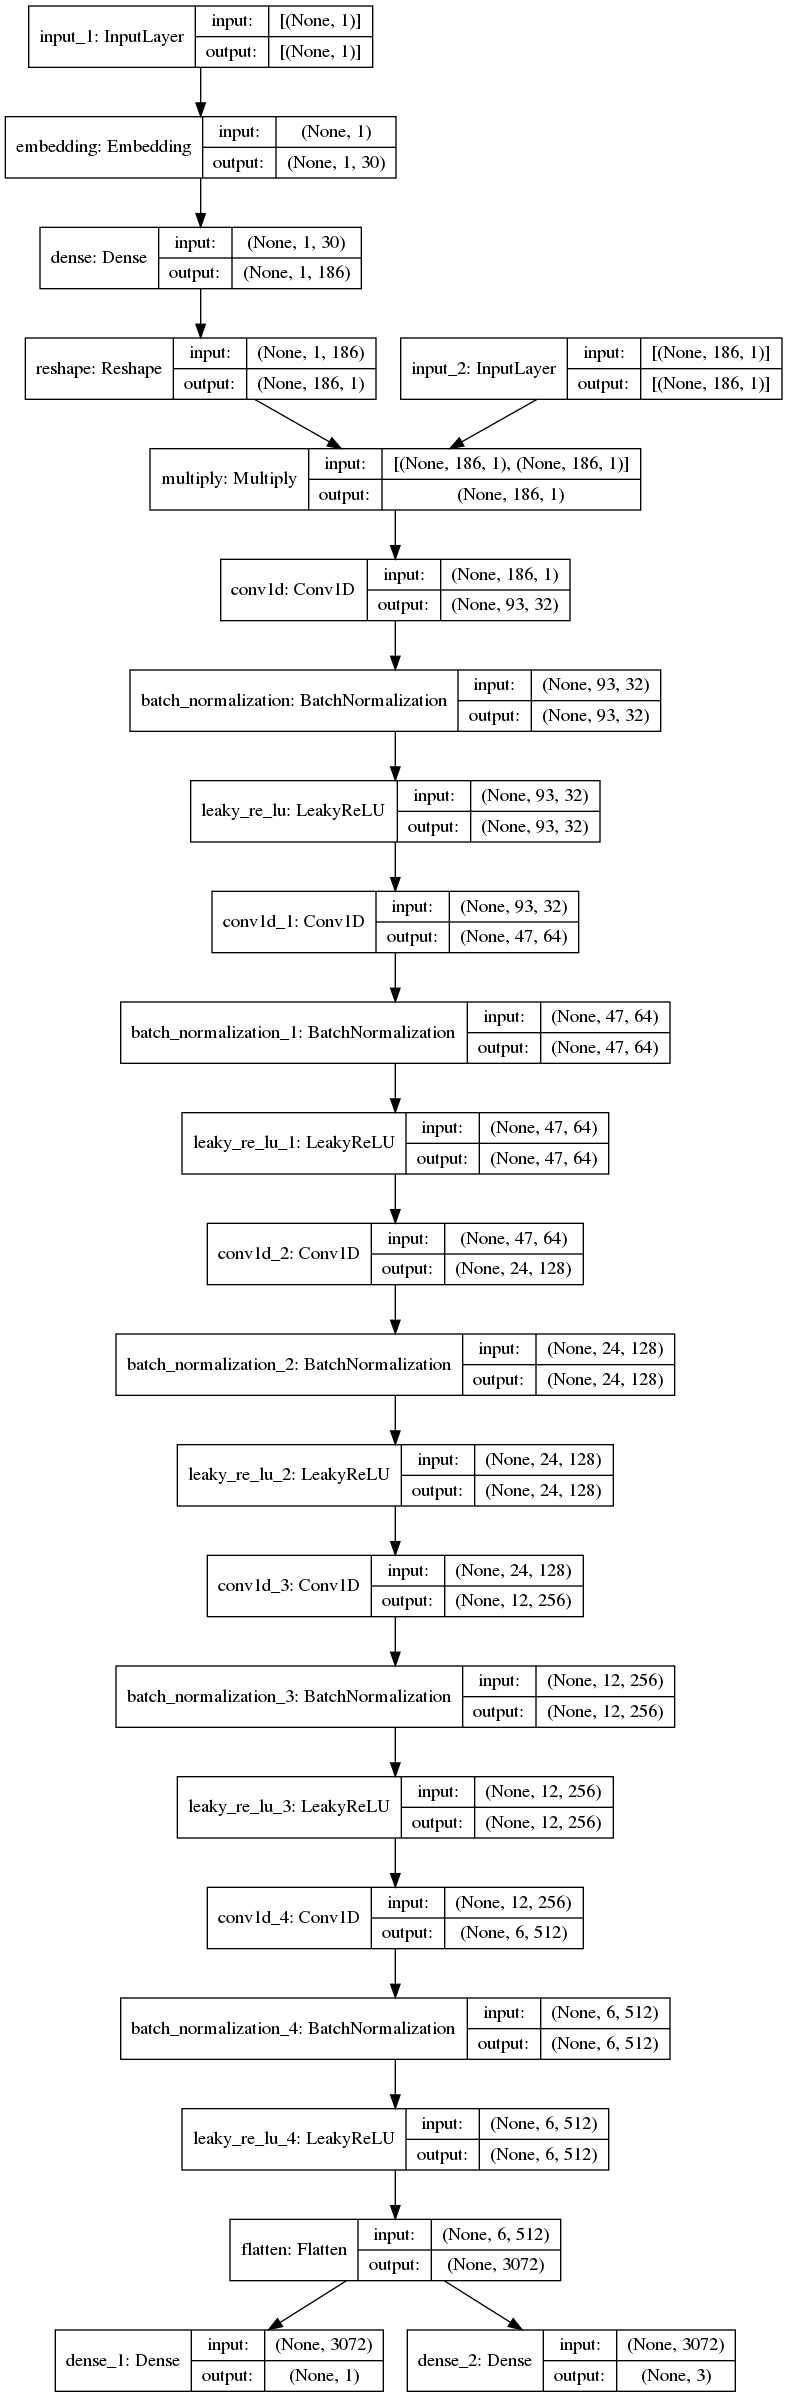

In [3]:
def discriminator(data_dim, input_classes=3):
    
    in_label = Input(shape=(1,))
    x = Embedding(input_classes, 30)(in_label)
    x = Dense(data_dim)(x)
    x = Reshape((data_dim,1))(x)
    
    D_in = Input(shape=[data_dim,1])
#     x = Concatenate()([D_in, x])
    x = Multiply()([D_in, x])
    
    x = Conv1D(filters=32, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Conv1D(filters=32*2, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Conv1D(filters=32*4, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Conv1D(filters=32*8, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Conv1D(filters=32*16, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)
    out1 = Dense(input_classes, activation='softmax')(x)
    
    model = Model(inputs=[D_in, in_label], outputs=[out, out1])
    opt = Adam(lr=0.0002, beta_1=0.5)
    loss = ['binary_crossentropy', 'categorical_crossentropy'] # 'sparse_categorical_crossentropy'
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

d_model = discriminator(data_dim=186, input_classes=3)
plot_model(d_model, to_file='disc.png', show_shapes=True)

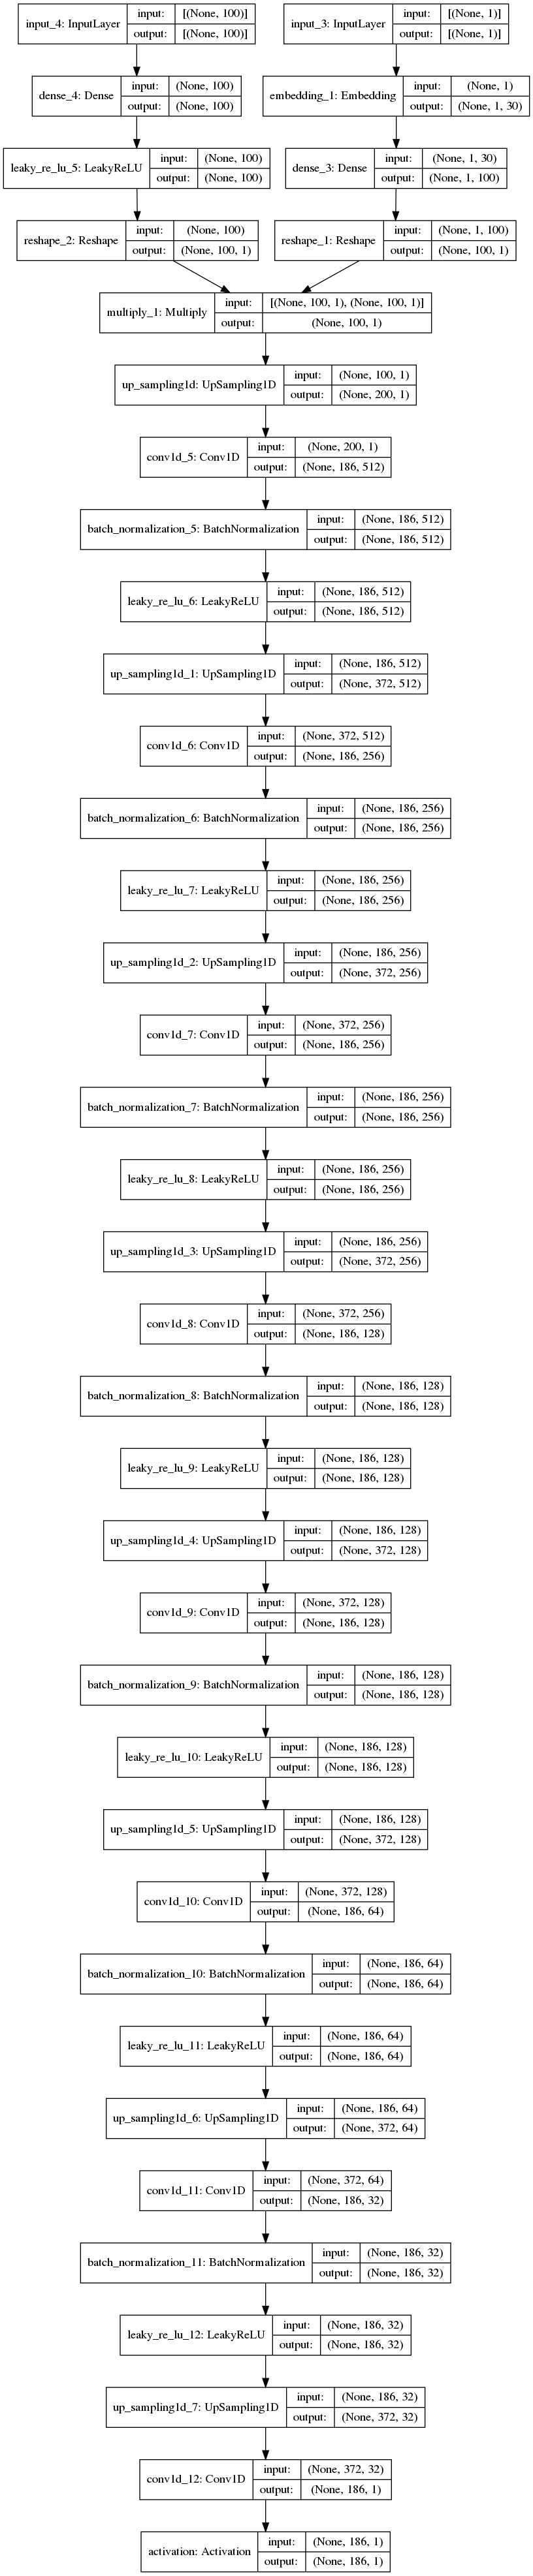

In [4]:
from keras.layers import UpSampling1D
from keras.layers.core import Activation

def generator(noise_dim=100, input_classes=3, out_dim=186):
    
    in_label = Input(shape=(1,))
    x = Embedding(input_classes, 30)(in_label)
    x = Dense(noise_dim)(x)
    x = Reshape((noise_dim,1))(x)
    
    G_in = Input(shape=[noise_dim,])
    gen = Dense(noise_dim)(G_in)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((noise_dim,1))(gen)

#     x = Concatenate()([gen, x])
    x = Multiply()([gen, x])
    
    x = UpSampling1D()(x)
    x = Conv1D(filters=32*16, kernel_size=15, strides=1, padding='valid', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32*8, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32*8, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32*4, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32*4, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32*2, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=32, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    # x = Activation('relu')(x)

    x = UpSampling1D()(x)
    x = Conv1D(filters=1, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal')(x)
    out = Activation('tanh')(x)
    model = Model(inputs=[G_in, in_label], outputs=out)

#     x = LeakyReLU(alpha=0.2)(x)
#     x = Flatten()(x)
#     x = Dense(out_dim)(x)
#     x = Reshape((out_dim,1))(x)
#     out = Activation('sigmoid')(x)
#     model = Model(inputs=[G_in, in_label], outputs=out)
    
    return model

g_model = generator(noise_dim=100, input_classes=3, out_dim=186)
plot_model(g_model, to_file='gen.png', show_shapes=True)

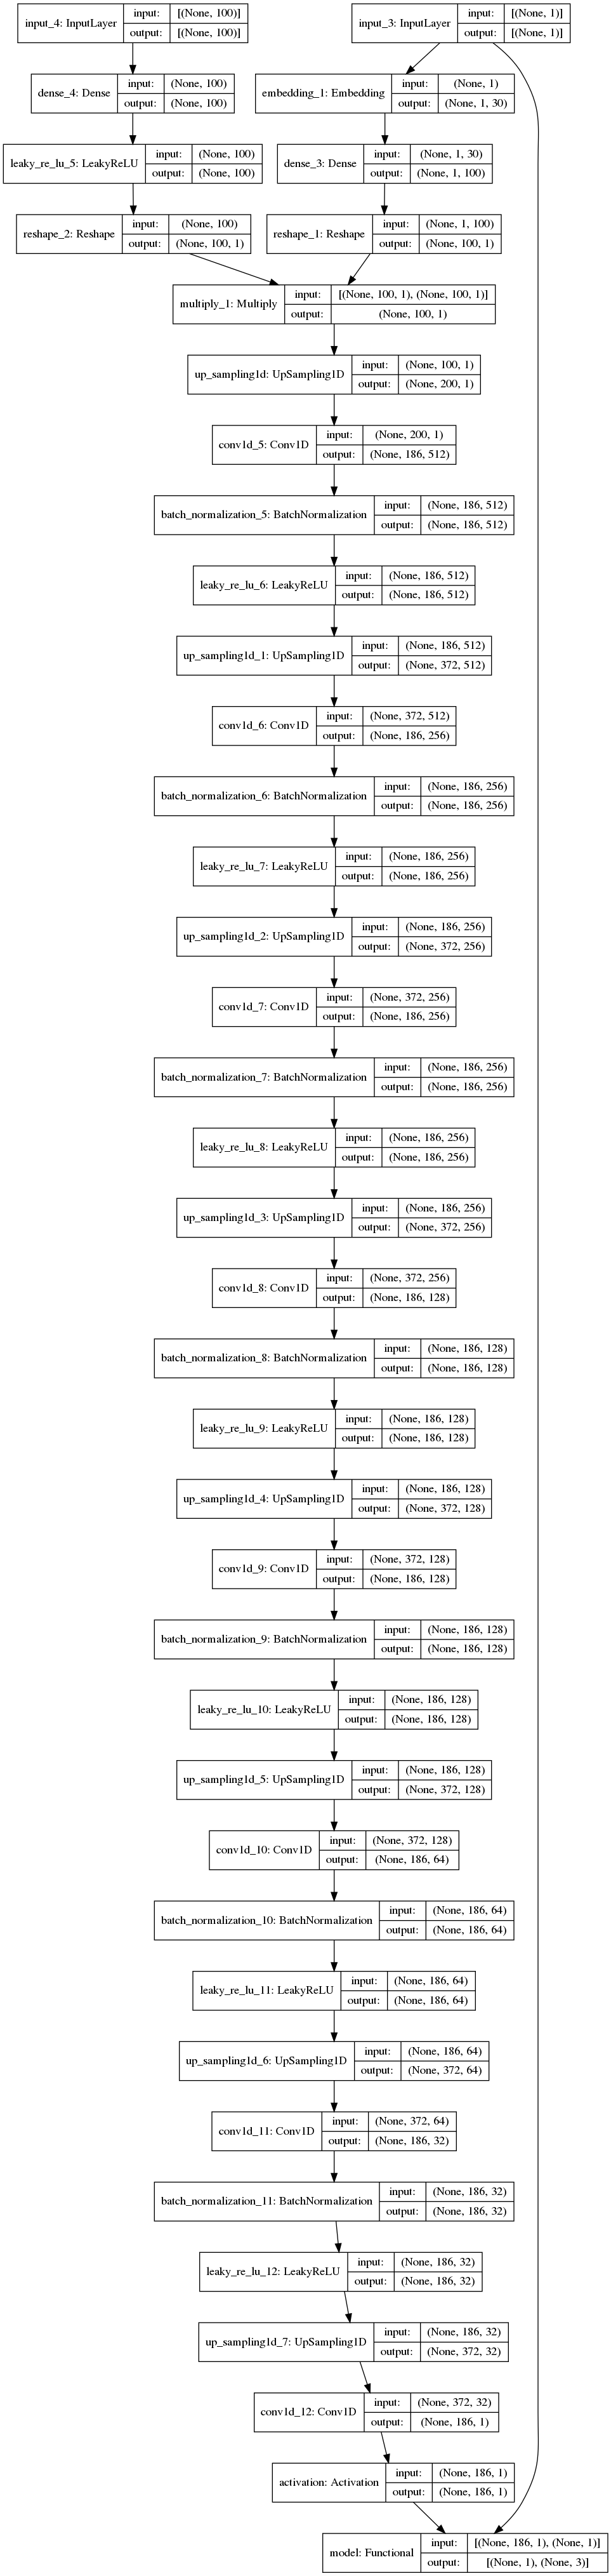

In [5]:
def create_gan(d_model, g_model):
    
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # get noise and label inputs from generator model
    gen_noise, gen_label = g_model.input
    # get image output from the generator model
    gen_output = g_model.output
    # connect image output and label input from generator as inputs to discriminator
    gan_output = d_model([gen_output, gen_label])
    # define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    loss = ['binary_crossentropy', 'categorical_crossentropy'] # 'sparse_categorical_crossentropy'
    model.compile(loss=loss, optimizer=opt)
    return model

gan_model = create_gan(d_model, g_model)
plot_model(gan_model, to_file='gan.png', show_shapes=True)

In [6]:
def load_real_samples():
    X = np.load('Data/X.npy')
    y = np.load('Data/y.npy')

    # print (X.shape, y.shape)

    X_N = X[y==0]
    X_S = X[y==1]
    X_V = X[y==2]

    y_N = y[y==0]
    y_S = y[y==1]
    y_V = y[y==2]

    # print (X_N.shape, y_N.shape)
    # print (X_S.shape, y_S.shape)
    # print (X_V.shape, y_V.shape)

    X_N=X_N.reshape(X_N.shape[0],X_N.shape[1],1)
    X_S=X_S.reshape(X_S.shape[0],X_S.shape[1],1)
    X_V=X_V.reshape(X_V.shape[0],X_V.shape[1],1)

    # print (X_N.shape, y_N.shape)
    # print (X_S.shape, y_S.shape)
    # print (X_V.shape, y_V.shape)
    return X_N, y_N, X_S, y_S, X_V, y_V

In [7]:
def generate_real_samples(X_N, y_N, X_S, y_S, X_V, y_V, n_samples):
    
    # choose random instances
    i_N = randint(0, y_N.shape[0], int(n_samples/3))
    i_S = randint(0, y_S.shape[0], int(n_samples/3))
    i_V = randint(0, y_V.shape[0], int(n_samples/3))
    
    # select ECG and labels
    X = np.vstack((X_N[i_N], X_S[i_S], X_V[i_V]))
    labels = np.hstack((y_N[i_N], y_S[i_S], y_V[i_V]))
    labels = labels.reshape(labels.shape[0], 1)
    
    # generate class labels
    y = np.random.uniform(0.7, 1, n_samples)
    y = y.reshape(y.shape[0], 1)
#     y = np.ones((n_samples, 1))
    return [X, labels], y

In [8]:
def reshape(X):
    if len(X.shape) == 1:
        X = X.reshape(X.shape[0], 1)
        return X
    else:
        if X.shape[-1] == 1:
            return X
        else:
            X = X.reshape(X.shape[0], X.shape[1], 1)
            return X

# generate points in latent space as input for the generator
# normal noise
def generate_latent_points(latent_dim, n_samples, n_classes=3):
    # generate points in the latent space
#     X_fake = np.random.uniform(0, 1.0, size=[n_samples, latent_dim])
    X_fake = np.random.normal(0,1.0,(n_samples,latent_dim))
    # generate labels
    # labels_fake = np.random.randint(0, n_classes, n_samples)
    labels_fake = np.hstack((np.zeros(int(n_samples/3)), np.ones(int(n_samples/3)), 2*np.ones(int(n_samples/3))))
    np.random.shuffle(labels_fake)
    return [reshape(X_fake), reshape(labels_fake)]

In [9]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict([z_input, labels_input])
    # create class labels
    y = np.random.uniform(0, 0.3, n_samples)
    y = y.reshape(y.shape[0], 1)
#     y = np.zeros((n_samples, 1))
    return [images, labels_input], y

In [10]:
# create and save a plot of generated images
def save_plot(X, n, name):
    plt.figure(figsize=(10,3))
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.plot(X[i, :, 0])
    plt.savefig(name, dpi=100)
    plt.close()

In [11]:
def get_real_samples(X_N, y_N, X_S, y_S, X_V, y_V):
    
    # choose random instances
    i_N = randint(0, y_N.shape[0], 1)
    i_S = randint(0, y_S.shape[0], 1)
    i_V = randint(0, y_V.shape[0], 1)
    
    # select ECG and labels
    X = np.vstack((X_N[i_N], X_S[i_S], X_V[i_V]))
    return X

def save_new_plot(X, n, name):
    plt.figure(figsize=(15,5))
    for i in range(n-1):
        plt.subplot(n+1, n-1, 1 + i)
        plt.axis('off')
        plt.plot(X[i, :, 0])
    for i in range(3, (n*n)-n):
        # define subplot
        plt.subplot(n+1, n-1, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.plot(X[i, :, 0])
    plt.savefig(name, dpi=50)
    plt.close()

In [ ]:
# size of the latent space
latent_dim = 100
# size of the data
data = 186
# classes
classes = 3

n_epochs=50

# multiples of three (three classes) (less thyan 24000)
n_batch=30

# samples to watch
n=3

# Loss Values
D_L_1 = np.infty
D_L_2 = np.infty
G_L = np.infty

# create the discriminator
d_model = discriminator(data_dim=data, input_classes=classes)
# create the generator
g_model = generator(noise_dim=latent_dim, input_classes=classes, out_dim=data)
# create the gan
gan_model = create_gan(d_model, g_model)

# load image data
X_N, y_N, X_S, y_S, X_V, y_V = load_real_samples()
# # train model
# train(g_model, d_model, gan_model, dataset, latent_dim)

bat_per_epo = int(y_S.shape[0] / n_batch)
half_batch = int(n_batch / 2)
flag=0

# losses = []
plt.ioff()

filename = 'Class_Incorporated_Multiply_Tanh'
# filename = 'Concatenate_TANH'
# filename = 'Multiply_Sigmoid'
# filename = 'Multiply_Tanh'

if not os.path.isdir(filename):
    os.mkdir(filename)

f = open(filename + '_Loss.csv', 'w')
f.write('d_loss1, d_loss2, g_loss \n')
f.close()

# manually enumerate epochs
for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
        # get randomly selected 'real' samples
        [X_real, labels_real], y_real = generate_real_samples(X_N, y_N, X_S, y_S, X_V, y_V, half_batch)
        # print (to_categorical(labels_real).shape)
        # update discriminator model weights
        d_loss1, _, _, _, _ = d_model.train_on_batch([X_real, labels_real], [y_real, to_categorical(labels_real)])
        # generate 'fake' examples
        [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # print (to_categorical(labels).shape)
        # update discriminator model weights
        d_loss2, _, _, _, _ = d_model.train_on_batch([X_fake, labels], [y_fake, to_categorical(labels)])
        # prepare points in latent space as input for the generator
        [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = np.random.uniform(0.7, 1, n_batch)
        y_gan = y_gan.reshape(y_gan.shape[0], 1)
        # y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        g_loss, _, _ = gan_model.train_on_batch([z_input, labels_input], [y_gan, to_categorical(labels_input)])
        
        if (d_loss1 < D_L_1 and d_loss2 < D_L_2) or g_loss < G_L:
            D_L_1 = d_loss1
            D_L_2 = d_loss2
            G_L = g_loss
            g_model.save(filename + '_cgan_generator.h5')
            
#         losses.append((d_loss1, d_loss2, g_loss))
        
        f = open(filename + '_Loss.csv', 'a')
        f.write(str(d_loss1)+','+str(d_loss2)+','+str(g_loss)+'\n')
        f.close()

        # summarize loss on this batch
        if (j+1)%3 == 0:
            print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
#         if (j+1)%5 == 0:
            name = filename + '/'+str(i*1000 + j)+'.jpg'
            # generate images
            latent_points, labels = generate_latent_points(latent_dim, n*n)
            # specify labels
            labels = asarray([x for _ in range(n) for x in range(n)])
            # generate images
            X  = g_model.predict([latent_points, labels])
            X_R = get_real_samples(X_N, y_N, X_S, y_S, X_V, y_V)
            X = np.vstack((X_R, X))
            save_new_plot(X, n+1, name)

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 3/807, d1=0.482, d2=1.369, g=1.769
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 6/807, d1=0.670, d2=0.669, g=1.768
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 9/807, d1=0.660, d2=0.710, g=1.762
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 12/807, d1=0.655, d2=0.577, g=1.756
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 15/807, d1=0.656, d2=0.538, g=1.740
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 18/807, d1=0.703, d2=0.508, g=1.727
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 21/807, d1=0.611, d2=0.645, g=1.714
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 24/807, d1=0.502, d2=0.447, g=1.710
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 27/807, d1=0.538, d2=0.488, g=1.696
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 30/807, d1=0.471, d2=0.484, g=1.686
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 33/807, d1=0.528, d2=0.404, g=1.668
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15

>1, 279/807, d1=0.479, d2=0.432, g=0.541
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 282/807, d1=0.390, d2=0.464, g=0.476
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 285/807, d1=0.490, d2=0.508, g=0.484
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 288/807, d1=0.416, d2=0.412, g=0.446
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 291/807, d1=0.405, d2=0.437, g=0.459
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 294/807, d1=0.452, d2=0.489, g=0.452
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 297/807, d1=0.397, d2=0.408, g=0.421
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 300/807, d1=0.477, d2=0.523, g=0.419
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 303/807, d1=0.435, d2=0.393, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 306/807, d1=0.450, d2=0.466, g=0.429
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 309/807, d1=0.413, d2=0.378, g=0.448
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 312/807, d1=0.465

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 558/807, d1=0.472, d2=0.410, g=0.537
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 561/807, d1=0.415, d2=0.438, g=0.443
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 564/807, d1=0.475, d2=0.462, g=0.491
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 567/807, d1=0.431, d2=0.445, g=0.415
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 570/807, d1=0.375, d2=0.426, g=0.414
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 573/807, d1=0.386, d2=0.537, g=0.463
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 576/807, d1=0.449, d2=0.433, g=0.446
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 579/807, d1=0.506, d2=0.488, g=0.508
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 582/807, d1=0.483, d2=0.444, g=0.500
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 585/807, d1=0.386, d2=0.422, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>1, 588/807, d1=0.458, d2=0.410, g=0.484
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
>2, 27/807, d1=0.392, d2=0.419, g=0.502
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 30/807, d1=0.429, d2=0.467, g=0.443
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 33/807, d1=0.414, d2=0.475, g=0.451
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 36/807, d1=0.420, d2=0.452, g=0.458
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 39/807, d1=0.502, d2=0.476, g=0.505
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 42/807, d1=0.454, d2=0.409, g=0.491
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 45/807, d1=0.416, d2=0.419, g=0.498
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 48/807, d1=0.453, d2=0.515, g=0.487
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 51/807, d1=0.506, d2=0.454, g=0.497
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 54/807, d1=0.420, d2=0.421, g=0.462
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 57/807, d1=0.465, d2=0.442, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 60/8

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 306/807, d1=0.437, d2=0.426, g=0.530
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 309/807, d1=0.454, d2=0.385, g=0.481
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 312/807, d1=0.449, d2=0.419, g=0.471
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 315/807, d1=0.395, d2=0.451, g=0.482
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 318/807, d1=0.430, d2=0.431, g=0.592
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 321/807, d1=0.415, d2=0.386, g=0.470
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 324/807, d1=0.337, d2=0.491, g=0.444
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 327/807, d1=0.461, d2=0.439, g=0.513
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 330/807, d1=0.484, d2=0.470, g=0.557
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 333/807, d1=0.408, d2=0.467, g=0.483
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 336/807, d1=0.503, d2=0.389, g=0.524
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
>2, 582/807, d1=0.413, d2=0.393, g=0.443
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 585/807, d1=0.332, d2=0.424, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 588/807, d1=0.408, d2=0.467, g=0.489
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 591/807, d1=0.408, d2=0.495, g=0.488
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 594/807, d1=0.484, d2=0.468, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 597/807, d1=0.429, d2=0.386, g=0.528
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 600/807, d1=0.478, d2=0.431, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 603/807, d1=0.424, d2=0.372, g=0.488
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 606/807, d1=0.420, d2=0.459, g=0.467
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 609/807, d1=0.409, d2=0.398, g=0.427
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 612/807, d1=0.473, d2=0.405, g=0.456
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>2, 6

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 54/807, d1=0.470, d2=0.448, g=0.410
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 57/807, d1=0.464, d2=0.449, g=0.408
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 60/807, d1=0.433, d2=0.470, g=0.460
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 63/807, d1=0.440, d2=0.411, g=0.446
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 66/807, d1=0.451, d2=0.406, g=0.472
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 69/807, d1=0.403, d2=0.442, g=0.508
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 72/807, d1=0.428, d2=0.407, g=0.467
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 75/807, d1=0.382, d2=0.452, g=0.435
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 78/807, d1=0.393, d2=0.446, g=0.434
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 81/807, d1=0.488, d2=0.471, g=0.444
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 84/807, d1=0.412, d2=0.402, g=0.435
(15, 3)
(15, 3)
(15, 3)
(15, 3)


(15, 3)
(15, 3)
(15, 3)
>3, 330/807, d1=0.446, d2=0.357, g=0.444
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 333/807, d1=0.415, d2=0.481, g=0.458
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 336/807, d1=0.503, d2=0.348, g=0.447
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 339/807, d1=0.408, d2=0.396, g=0.476
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 342/807, d1=0.365, d2=0.405, g=0.451
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 345/807, d1=0.380, d2=0.410, g=0.437
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 348/807, d1=0.350, d2=0.470, g=0.448
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 351/807, d1=0.422, d2=0.383, g=0.425
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 354/807, d1=0.369, d2=0.502, g=0.466
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 357/807, d1=0.520, d2=0.443, g=0.450
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 360/807, d1=0.426, d2=0.317, g=0.485
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 

>3, 606/807, d1=0.338, d2=0.473, g=0.467
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 609/807, d1=0.472, d2=0.448, g=0.440
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 612/807, d1=0.474, d2=0.408, g=0.494
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 615/807, d1=0.468, d2=0.413, g=0.451
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 618/807, d1=0.467, d2=0.434, g=0.407
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 621/807, d1=0.411, d2=0.371, g=0.452
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 624/807, d1=0.407, d2=0.288, g=0.510
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 627/807, d1=0.498, d2=0.406, g=0.436
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 630/807, d1=0.470, d2=0.456, g=0.426
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 633/807, d1=0.434, d2=0.417, g=0.462
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 636/807, d1=0.376, d2=0.352, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>3, 639/807, d1=0.455

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 78/807, d1=0.405, d2=0.461, g=0.455
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 81/807, d1=0.424, d2=0.354, g=0.472
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 84/807, d1=0.487, d2=0.463, g=0.494
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 87/807, d1=0.414, d2=0.456, g=0.498
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 90/807, d1=0.411, d2=0.374, g=0.470
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 93/807, d1=0.420, d2=0.415, g=0.434
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 96/807, d1=0.391, d2=0.418, g=0.470
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 99/807, d1=0.436, d2=0.342, g=0.491
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 102/807, d1=0.461, d2=0.481, g=0.476
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 105/807, d1=0.412, d2=0.452, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 108/807, d1=0.413, d2=0.414, g=0.458
(15, 3)
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
>4, 354/807, d1=0.383, d2=0.486, g=0.488
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 357/807, d1=0.407, d2=0.394, g=0.480
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 360/807, d1=0.434, d2=0.454, g=0.438
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 363/807, d1=0.391, d2=0.413, g=0.455
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 366/807, d1=0.522, d2=0.379, g=0.460
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 369/807, d1=0.418, d2=0.471, g=0.482
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 372/807, d1=0.391, d2=0.461, g=0.487
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 375/807, d1=0.435, d2=0.489, g=0.437
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 378/807, d1=0.492, d2=0.410, g=0.479
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 381/807, d1=0.452, d2=0.403, g=0.519
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 384/807, d1=0.414, d2=0.422, g=0.454
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 

>4, 630/807, d1=0.434, d2=0.393, g=0.473
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 633/807, d1=0.376, d2=0.433, g=0.456
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 636/807, d1=0.390, d2=0.418, g=0.449
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 639/807, d1=0.459, d2=0.437, g=0.481
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 642/807, d1=0.435, d2=0.495, g=0.463
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 645/807, d1=0.431, d2=0.428, g=0.474
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 648/807, d1=0.359, d2=0.431, g=0.426
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 651/807, d1=0.437, d2=0.396, g=0.486
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 654/807, d1=0.398, d2=0.502, g=0.456
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 657/807, d1=0.420, d2=0.457, g=0.463
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 660/807, d1=0.454, d2=0.410, g=0.442
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>4, 663/807, d1=0.468

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 102/807, d1=0.454, d2=0.420, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 105/807, d1=0.405, d2=0.466, g=0.487
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 108/807, d1=0.409, d2=0.406, g=0.452
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 111/807, d1=0.418, d2=0.367, g=0.477
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 114/807, d1=0.436, d2=0.426, g=0.509
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 117/807, d1=0.404, d2=0.523, g=0.502
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 120/807, d1=0.402, d2=0.387, g=0.446
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 123/807, d1=0.394, d2=0.403, g=0.472
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 126/807, d1=0.403, d2=0.423, g=0.444
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 129/807, d1=0.393, d2=0.357, g=0.451
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 132/807, d1=0.389, d2=0.441, g=0.472
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
>5, 378/807, d1=0.411, d2=0.427, g=0.461
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 381/807, d1=0.461, d2=0.434, g=0.438
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 384/807, d1=0.424, d2=0.400, g=0.493
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 387/807, d1=0.445, d2=0.449, g=0.431
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 390/807, d1=0.415, d2=0.430, g=0.496
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 393/807, d1=0.419, d2=0.347, g=0.528
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 396/807, d1=0.369, d2=0.464, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 399/807, d1=0.426, d2=0.413, g=0.471
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 402/807, d1=0.507, d2=0.436, g=0.491
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 405/807, d1=0.462, d2=0.444, g=0.497
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 408/807, d1=0.444, d2=0.485, g=0.487
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 4

>5, 654/807, d1=0.399, d2=0.487, g=0.429
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 657/807, d1=0.402, d2=0.418, g=0.453
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 660/807, d1=0.385, d2=0.422, g=0.473
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 663/807, d1=0.431, d2=0.463, g=0.453
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 666/807, d1=0.418, d2=0.402, g=0.475
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 669/807, d1=0.363, d2=0.528, g=0.518
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 672/807, d1=0.479, d2=0.354, g=0.447
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 675/807, d1=0.462, d2=0.425, g=0.488
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 678/807, d1=0.416, d2=0.428, g=0.469
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 681/807, d1=0.463, d2=0.432, g=0.452
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 684/807, d1=0.381, d2=0.458, g=0.464
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>5, 687/807, d1=0.387

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 126/807, d1=0.422, d2=0.489, g=0.495
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 129/807, d1=0.417, d2=0.390, g=0.477
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 132/807, d1=0.343, d2=0.367, g=0.492
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 135/807, d1=0.425, d2=0.419, g=0.497
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 138/807, d1=0.357, d2=0.397, g=0.430
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 141/807, d1=0.374, d2=0.456, g=0.432
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 144/807, d1=0.459, d2=0.442, g=0.475
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 147/807, d1=0.418, d2=0.385, g=0.493
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 150/807, d1=0.419, d2=0.486, g=0.472
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 153/807, d1=0.495, d2=0.449, g=0.515
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 156/807, d1=0.495, d2=0.469, g=0.471
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
>6, 402/807, d1=0.537, d2=0.424, g=0.483
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 405/807, d1=0.453, d2=0.413, g=0.504
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 408/807, d1=0.427, d2=0.449, g=0.496
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 411/807, d1=0.394, d2=0.446, g=0.446
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 414/807, d1=0.351, d2=0.504, g=0.437
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 417/807, d1=0.440, d2=0.462, g=0.482
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 420/807, d1=0.394, d2=0.424, g=0.512
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 423/807, d1=0.420, d2=0.483, g=0.473
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 426/807, d1=0.366, d2=0.443, g=0.481
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 429/807, d1=0.451, d2=0.470, g=0.471
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 432/807, d1=0.401, d2=0.365, g=0.494
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 4

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 681/807, d1=0.420, d2=0.455, g=0.496
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 684/807, d1=0.447, d2=0.450, g=0.499
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 687/807, d1=0.413, d2=0.403, g=0.475
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 690/807, d1=0.404, d2=0.384, g=0.478
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 693/807, d1=0.418, d2=0.418, g=0.449
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 696/807, d1=0.420, d2=0.472, g=0.488
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 699/807, d1=0.365, d2=0.423, g=0.441
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 702/807, d1=0.447, d2=0.449, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 705/807, d1=0.441, d2=0.420, g=0.480
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 708/807, d1=0.444, d2=0.417, g=0.424
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>6, 711/807, d1=0.447, d2=0.407, g=0.477
(15, 3)
(15, 3)
(15, 

>7, 150/807, d1=0.432, d2=0.388, g=0.486
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 153/807, d1=0.520, d2=0.436, g=0.485
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 156/807, d1=0.409, d2=0.405, g=0.492
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 159/807, d1=0.468, d2=0.386, g=0.484
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 162/807, d1=0.390, d2=0.443, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 165/807, d1=0.388, d2=0.459, g=0.457
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 168/807, d1=0.490, d2=0.469, g=0.486
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 171/807, d1=0.399, d2=0.368, g=0.496
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 174/807, d1=0.472, d2=0.474, g=0.482
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 177/807, d1=0.470, d2=0.448, g=0.508
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 180/807, d1=0.433, d2=0.428, g=0.506
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 183/807, d1=0.439

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 429/807, d1=0.430, d2=0.406, g=0.535
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 432/807, d1=0.417, d2=0.497, g=0.509
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 435/807, d1=0.405, d2=0.427, g=0.480
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 438/807, d1=0.412, d2=0.405, g=0.454
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 441/807, d1=0.451, d2=0.478, g=0.456
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 444/807, d1=0.456, d2=0.419, g=0.484
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 447/807, d1=0.378, d2=0.435, g=0.484
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 450/807, d1=0.392, d2=0.409, g=0.442
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 453/807, d1=0.392, d2=0.358, g=0.463
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 456/807, d1=0.459, d2=0.385, g=0.475
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 459/807, d1=0.434, d2=0.488, g=0.477
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
>7, 705/807, d1=0.475, d2=0.418, g=0.596
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 708/807, d1=0.379, d2=0.421, g=0.541
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 711/807, d1=0.402, d2=0.411, g=0.556
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 714/807, d1=0.375, d2=0.412, g=0.574
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 717/807, d1=0.361, d2=0.356, g=0.569
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 720/807, d1=0.406, d2=0.453, g=0.552
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 723/807, d1=0.446, d2=0.391, g=0.577
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 726/807, d1=0.488, d2=0.416, g=0.620
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 729/807, d1=0.395, d2=0.450, g=0.551
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 732/807, d1=0.384, d2=0.467, g=0.548
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>7, 735/807, d1=0.470, d2=0.389, g=0.602
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 177/807, d1=0.408, d2=0.451, g=0.568
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 180/807, d1=0.420, d2=0.420, g=0.568
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 183/807, d1=0.397, d2=0.475, g=0.588
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 186/807, d1=0.431, d2=0.389, g=0.574
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 189/807, d1=0.409, d2=0.382, g=0.599
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 192/807, d1=0.426, d2=0.368, g=0.565
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 195/807, d1=0.372, d2=0.435, g=0.555
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 198/807, d1=0.403, d2=0.440, g=0.540
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 201/807, d1=0.406, d2=0.476, g=0.574
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 204/807, d1=0.413, d2=0.483, g=0.538
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 207/807, d1=0.422, d2=0.486, g=0.523
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
>8, 453/807, d1=0.413, d2=0.464, g=0.533
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 456/807, d1=0.384, d2=0.370, g=0.553
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 459/807, d1=0.413, d2=0.363, g=0.560
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 462/807, d1=0.349, d2=0.519, g=0.485
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 465/807, d1=0.385, d2=0.398, g=0.565
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 468/807, d1=0.433, d2=0.479, g=0.559
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 471/807, d1=0.439, d2=0.381, g=0.585
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 474/807, d1=0.349, d2=0.466, g=0.521
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 477/807, d1=0.412, d2=0.473, g=0.501
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 480/807, d1=0.472, d2=0.505, g=0.554
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 483/807, d1=0.391, d2=0.474, g=0.519
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 

>8, 729/807, d1=0.371, d2=0.402, g=0.573
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 732/807, d1=0.406, d2=0.452, g=0.556
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 735/807, d1=0.406, d2=0.437, g=0.559
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 738/807, d1=0.488, d2=0.480, g=0.566
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 741/807, d1=0.465, d2=0.406, g=0.576
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 744/807, d1=0.445, d2=0.431, g=0.573
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 747/807, d1=0.380, d2=0.382, g=0.561
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 750/807, d1=0.414, d2=0.461, g=0.563
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 753/807, d1=0.412, d2=0.416, g=0.570
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 756/807, d1=0.366, d2=0.362, g=0.582
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 759/807, d1=0.349, d2=0.417, g=0.512
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>8, 762/807, d1=0.424

(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 201/807, d1=0.432, d2=0.417, g=0.587
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 204/807, d1=0.403, d2=0.379, g=0.563
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 207/807, d1=0.355, d2=0.370, g=0.571
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 210/807, d1=0.445, d2=0.384, g=0.590
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 213/807, d1=0.441, d2=0.375, g=0.601
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 216/807, d1=0.457, d2=0.457, g=0.576
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 219/807, d1=0.368, d2=0.427, g=0.550
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 222/807, d1=0.377, d2=0.421, g=0.551
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 225/807, d1=0.428, d2=0.418, g=0.603
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 228/807, d1=0.446, d2=0.400, g=0.588
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 231/807, d1=0.426, d2=0.421, g=0.579
(15, 3)
(15, 3)
(15, 

(15, 3)
(15, 3)
(15, 3)
>9, 477/807, d1=0.440, d2=0.368, g=0.573
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 480/807, d1=0.470, d2=0.401, g=0.603
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 483/807, d1=0.450, d2=0.424, g=0.547
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 486/807, d1=0.403, d2=0.377, g=0.591
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 489/807, d1=0.311, d2=0.482, g=0.529
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 492/807, d1=0.399, d2=0.395, g=0.561
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 495/807, d1=0.425, d2=0.510, g=0.548
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 498/807, d1=0.425, d2=0.431, g=0.559
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 501/807, d1=0.422, d2=0.479, g=0.512
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 504/807, d1=0.477, d2=0.464, g=0.559
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 507/807, d1=0.449, d2=0.378, g=0.564
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 

>9, 753/807, d1=0.442, d2=0.394, g=0.558
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 756/807, d1=0.435, d2=0.350, g=0.588
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 759/807, d1=0.476, d2=0.469, g=0.548
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 762/807, d1=0.398, d2=0.497, g=0.537
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 765/807, d1=0.483, d2=0.490, g=0.558
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 768/807, d1=0.439, d2=0.425, g=0.574
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 771/807, d1=0.379, d2=0.463, g=0.553
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 774/807, d1=0.402, d2=0.350, g=0.603
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 777/807, d1=0.396, d2=0.483, g=0.537
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 780/807, d1=0.434, d2=0.401, g=0.574
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 783/807, d1=0.430, d2=0.400, g=0.566
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>9, 786/807, d1=0.457

(15, 3)
(15, 3)
(15, 3)
>10, 222/807, d1=0.426, d2=0.379, g=0.573
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 225/807, d1=0.441, d2=0.412, g=0.551
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 228/807, d1=0.458, d2=0.421, g=0.582
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 231/807, d1=0.369, d2=0.482, g=0.517
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 234/807, d1=0.412, d2=0.444, g=0.585
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 237/807, d1=0.394, d2=0.331, g=0.582
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 240/807, d1=0.420, d2=0.397, g=0.563
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 243/807, d1=0.402, d2=0.484, g=0.515
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 246/807, d1=0.409, d2=0.364, g=0.562
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 249/807, d1=0.418, d2=0.355, g=0.567
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(15, 3)
>10, 252/807, d1=0.455, d2=0.345, g=0.608
(15, 3)
(15, 3)
(15, 3)
(15, 3)
(1

In [ ]:
# # manually enumerate epochs
# for i in range(n_epochs):
#     # enumerate batches over the training set
#     for j in range(bat_per_epo):
#         # get randomly selected 'real' samples
#         [X_real, labels_real], y_real = generate_real_samples(X_N, y_N, X_S, y_S, X_V, y_V, half_batch)
#         break
#     break

# X_real.shape

# labels_real.shape

# y_real.shape

# to_categorical(labels_real).shape

# h = d_model.train_on_batch([X_real, labels_real], [y_real, to_categorical(labels_real)])

# h

In [ ]:
#             flag=1
#             break
#         if d_loss1==0 or d_loss2==0 or g_loss==0:
#             flag=1
#             break
#     if flag==1:
#         break

In [ ]:
# len(losses)

# Patience=10
# count = 0
# for i in range(1,Patience+1): 
#     print (-i, g_loss, losses[-i][2])
#     if g_loss > losses[-i][2]:
#         count  = count + 1
#         print (losses[-i][2])

# save best model

In [ ]:
# from evaluation_metrics import *
# metric_to_calculate = ['FID', 'MMD', 'DTW', 'ED', 'PC', 'KLD', 'RMSE', 'TWED']
# f = open(data_dir+'Stats.csv', 'a')
# f.write('Epoch, d_loss1, d_loss2, g_loss, ')
# for i in range(len(label_dict)):
#     for mtc in metric_to_calculate:
#         f.write(str(mtc)+str(i)+',')
# f.write('Time,\n')
# f.close()

# d_loss1 = float(d_loss1.history['loss'][0])
# d_loss2 = float(d_loss2.history['loss'][0])
# g_loss = float(g_loss.history['loss'][0])

# if i%checkpoint == 0:
        
#         f = open(data_dir+'Stats.csv', 'a')
#         f.write(str(i+1)+','+str(d_loss1)+','+str(d_loss2)+','+str(g_loss)+',')
#         save_model(model=G, data_dir=data_dir, type='G', epoch=i)
#         save_model(model=D, data_dir=data_dir, type='D', epoch=i)
#         save_model(model=GAN, data_dir=data_dir, type='GAN', epoch=i)
        
#         for k,metric in enumerate(label_dict.keys()):    
#             temp_x = test_data[200*(k):200*(k+1),:-1]
#             [z_input, labels_input] = generate_class_specific_latent_input(200, n_classes=n_classes, noise_dim=noise_dim, category=float(metric))
#             z_input = G.predict([z_input, labels_input], verbose=verbose)

#             for j in range(2):
#                 plt.plot(z_input[j])
#             plt.savefig(data_dir+str(i)+'_Label_'+str(metric)+'.png')
#             plt.close()
#             plt.clf()
            
#             results = evaluate(temp_x,z_input,metric_to_calculate)
#             for r in results:
#                 f.write(str(r)+',')
            
#         f.write(str(end-start)+'\n')
#         f.close()

In [ ]:
# #     # save the generator model
#     g_model.save('cgan_generator.h5')

# callback = [EarlyStopping(monitor='val_AUC', mode='max', verbose=1, patience=Pat),
#          ModelCheckpoint(filepath=str(twelve_lead_model_filename)+'_check_model.h5', 
#                          monitor='val_AUC', verbose=1, save_best_only=True, mode='max'),
#          ReduceLROnPlateau(monitor='val_AUC', factor=0.5, patience=Pat//2, verbose=1, 
#                            mode='max', min_delta=0.0001, cooldown=0, min_lr=0)]

# # model = parallel_NN(WINDOW_SIZE,INPUT_FEAT,OUTPUT_CLASS):
# model = parallel_NN(Window, len(leads), snomed_classes.shape[0])

# model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#               metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
#                        tf.keras.metrics.Recall(name='Recall'),
#                        tf.keras.metrics.Precision(name='Precision'),
#                        tf.keras.metrics.AUC(num_thresholds=200,summation_method="interpolation",
#                                             name="AUC",dtype=None,curve="ROC",thresholds=None,
#                                             multi_label=True,label_weights=None)])
# history = model.fit(train_generator, steps_per_epoch=train_samples, epochs=EP, verbose=1,
#                 validation_data=val_generator, validation_steps=val_samples, callbacks=callback)


# history_name = output_directory + '/' + twelve_lead_filename
# print (twelve_lead_model_filename, history_name)

# save_model(twelve_lead_model_filename, model)
# write_history(history_name, history.history)